In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

incidents = pd.read_csv("police_incidents.csv")

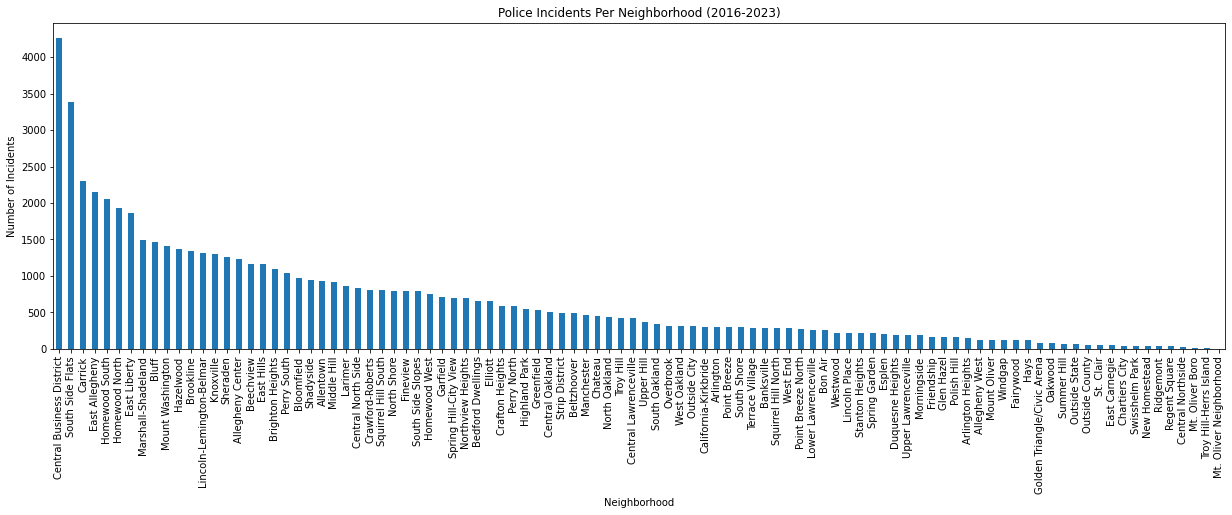

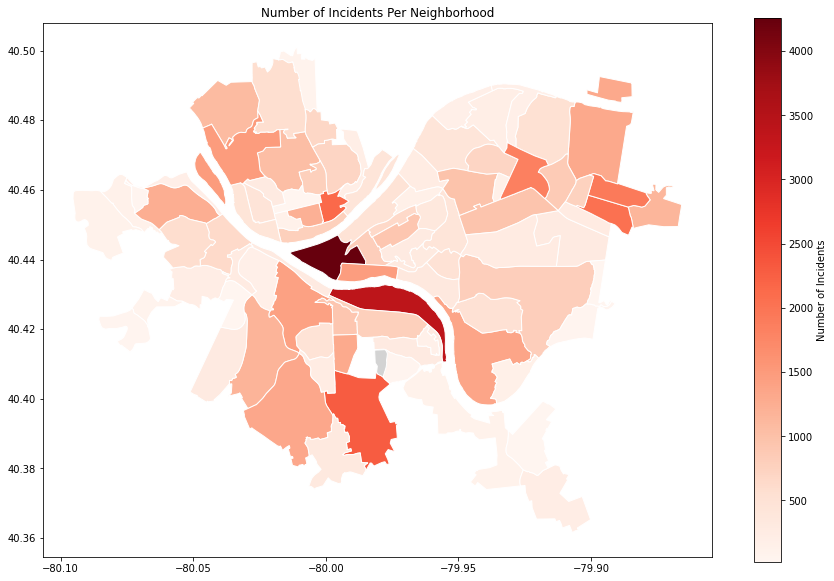

In [196]:
num_incidents = incidents["INCIDENTNEIGHBORHOOD"].value_counts()
num_incidents.columns = ["neighborhood", "Incidents"]
num_incidents.plot.bar(figsize=(21,6))
plt.title("Police Incidents Per Neighborhood (2016-2023)")
plt.ylabel("Number of Incidents")
plt.xlabel("Neighborhood")

num_incidents = incidents["INCIDENTNEIGHBORHOOD"].value_counts().reset_index()
num_incidents.columns = ["INCIDENTNEIGHBORHOOD", "Incidents"]

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
merged_data = pd.merge(neighborhoods, num_incidents, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
incidents_map = geopandas.GeoDataFrame(merged_data, geometry='geometry')

incidents_map.plot(column='Incidents',
                   cmap='Reds',
                   edgecolor="white",
                   legend=True,
                   legend_kwds={'label': "Number of Incidents"},
                   figsize=(15, 10),
                   missing_kwds={"color": "lightgrey"}
                   )

plt.title("Number of Incidents Per Neighborhood")
plt.show()

Text(0.5, 0, 'Neighborhood')

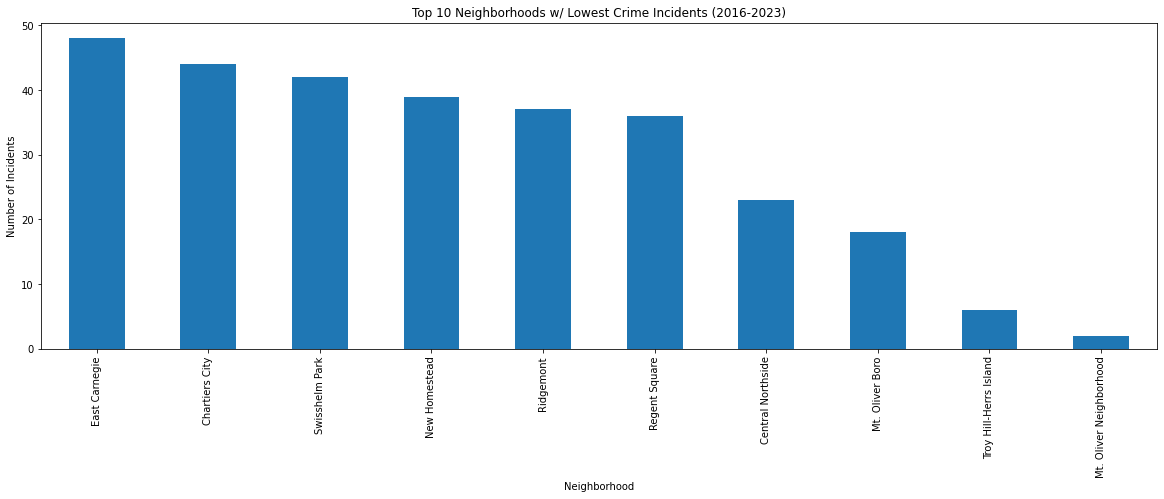

In [192]:
num_incidents_top10 = incidents["INCIDENTNEIGHBORHOOD"].value_counts().tail(10)
num_incidents_top10.columns = ["neighborhood", "Incidents"]
num_incidents_top10.plot.bar(figsize=(20,6))
plt.title("Top 10 Neighborhoods w/ Lowest Crime Incidents (2016-2023)")
plt.ylabel("Number of Incidents")
plt.xlabel("Neighborhood")

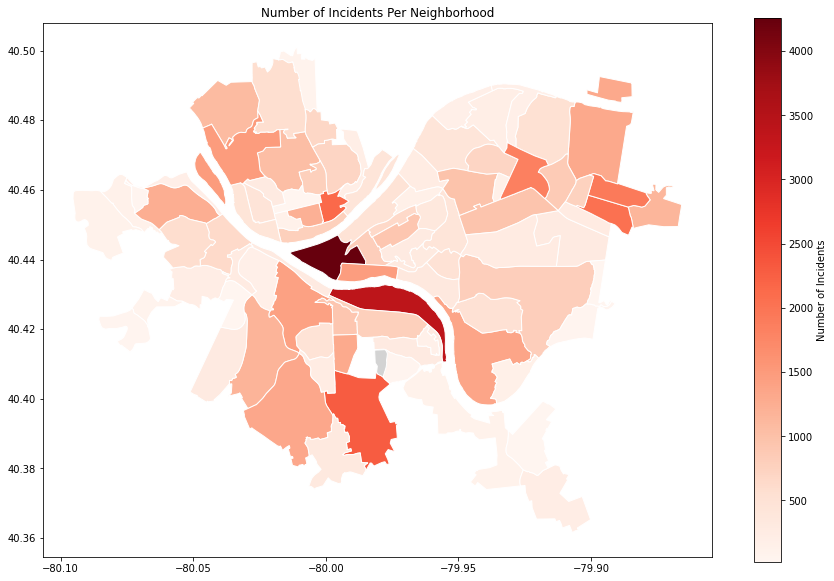

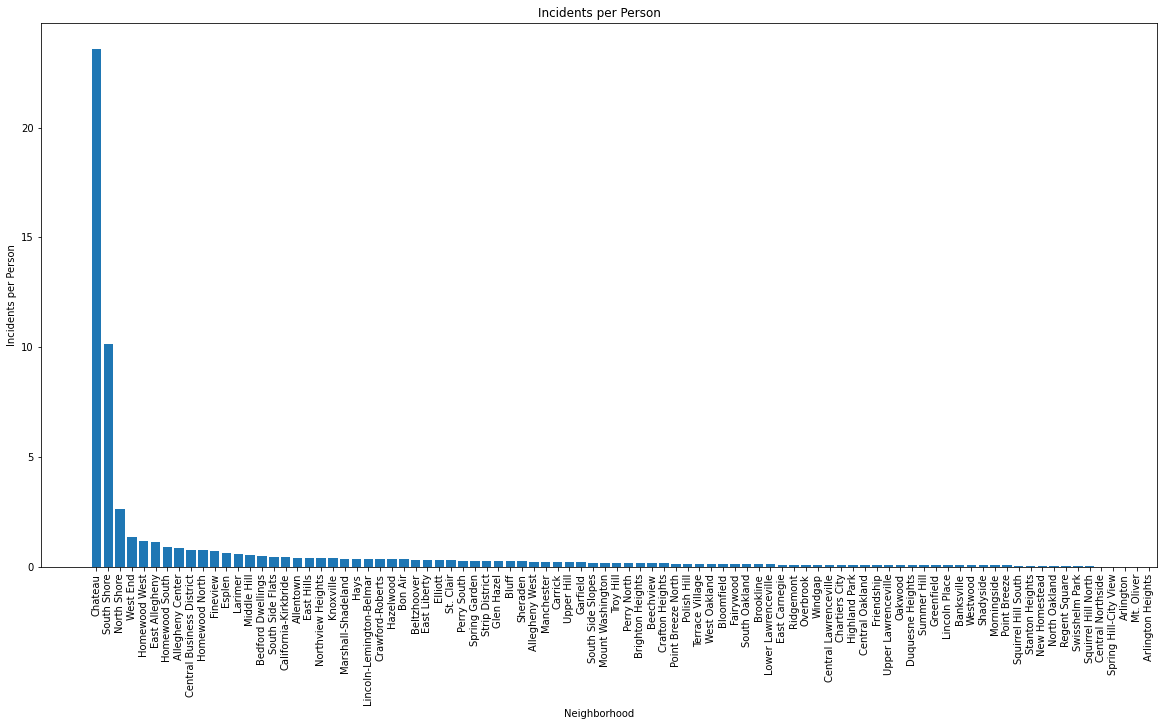

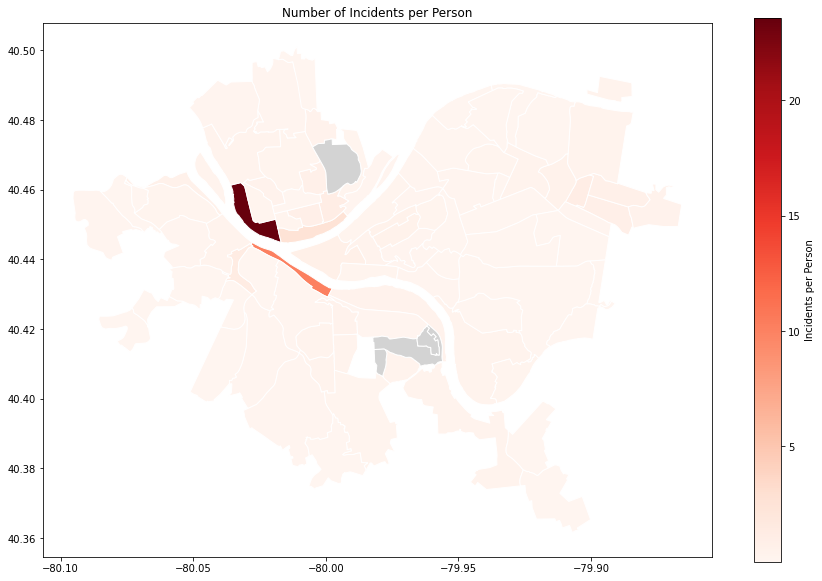

In [194]:
populations = pd.read_csv("populations.csv")

num_incidents = incidents["INCIDENTNEIGHBORHOOD"].value_counts().reset_index()

num_incidents.columns = ["INCIDENTNEIGHBORHOOD", "Incidents"]
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
merged_data = pd.merge(neighborhoods, num_incidents, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
incidents_map = geopandas.GeoDataFrame(merged_data, geometry='geometry')

merged_data2 = incidents_map.merge(populations, how="left", left_on="hood", right_on="Neighborhood")

merged_data2["incidents_per_person"] = merged_data2["Incidents"] / merged_data2["2020_Total_Population"]

merged_data_sorted = merged_data2.sort_values(by="incidents_per_person", ascending=False)
#merged_data_sorted = merged_data_sorted.iloc[:-4]

plt.figure(figsize = (20,10))
plt.bar(merged_data_sorted["hood"], merged_data_sorted["incidents_per_person"])
plt.title("Incidents per Person")
plt.xlabel("Neighborhood")
plt.ylabel("Incidents per Person")
plt.xticks(rotation=90)
plt.show()

merged_data_sorted.plot(column='incidents_per_person', 
               cmap='Reds',              
               edgecolor="white",        
               legend=True,            
               legend_kwds={'label': "Incidents per Person"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

plt.title("Number of Incidents per Person")
plt.show()

### In order to properly look at the data, we can now remove the the outliers (Chateau, South Shore, North Shore) in the sorted incidents per person to see how the bar graph and map changes.

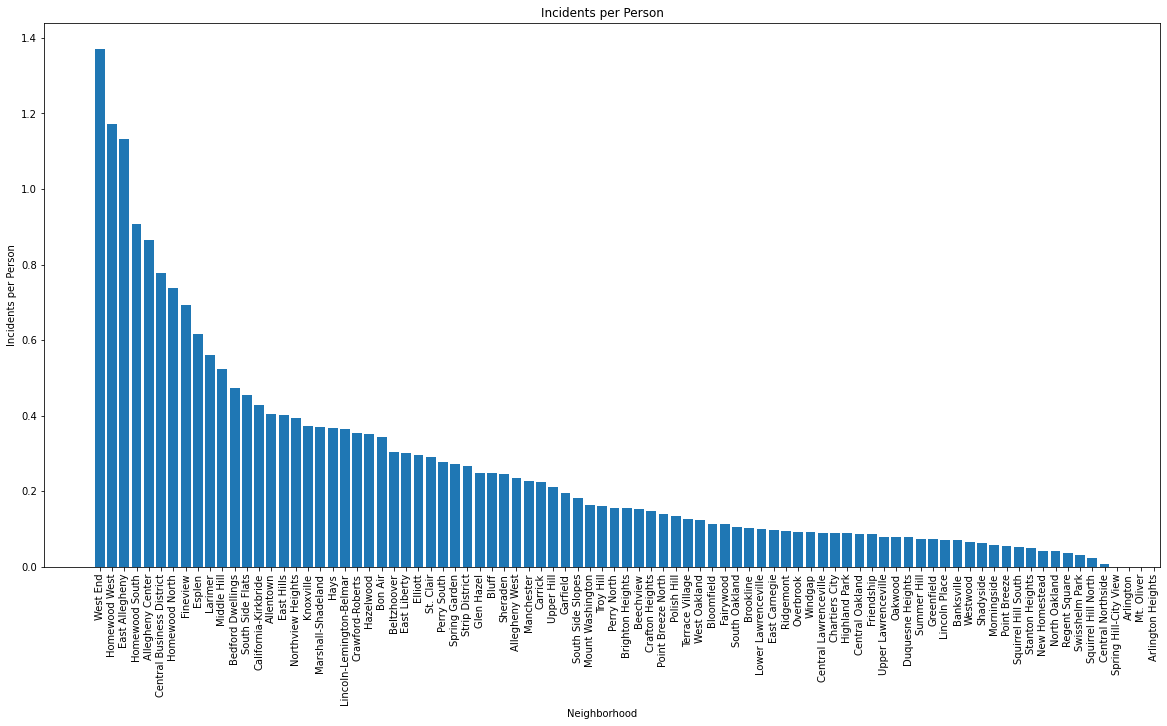

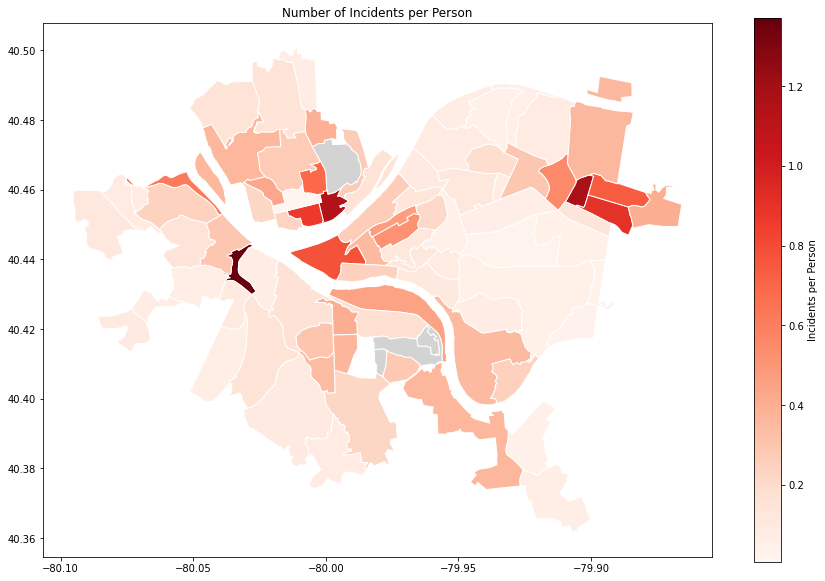

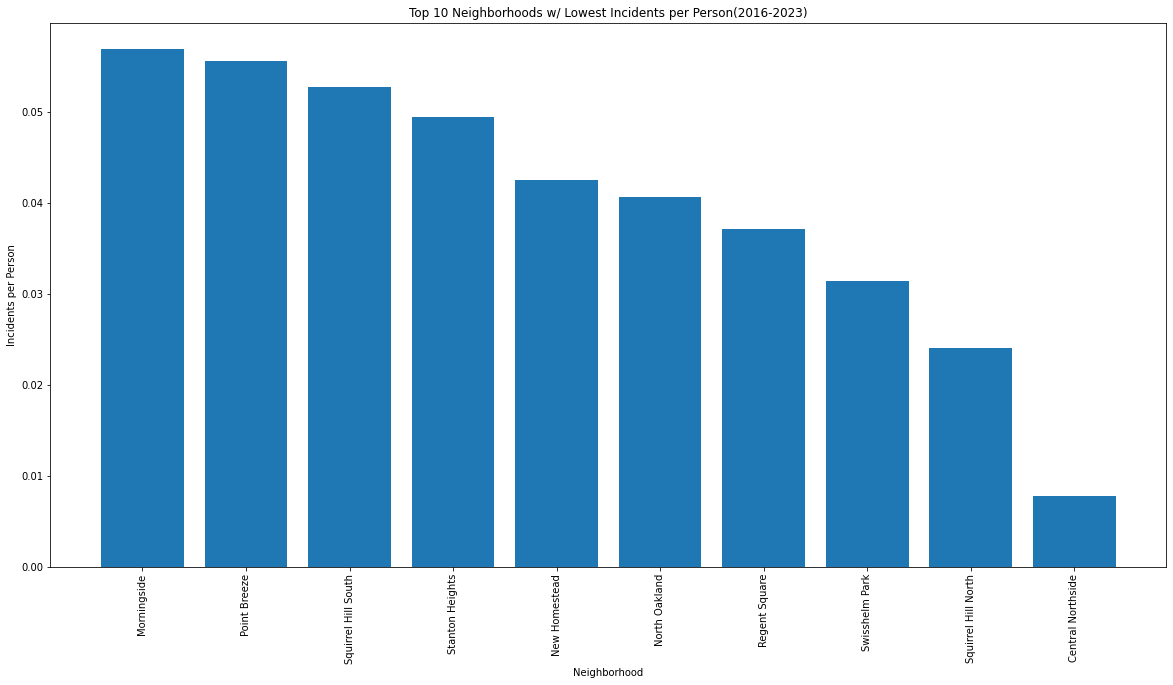

In [195]:
merged_data_sorted = merged_data_sorted.iloc[3:]

plt.figure(figsize = (20,10))
plt.bar(merged_data_sorted["hood"], merged_data_sorted["incidents_per_person"])
plt.title("Incidents per Person")
plt.xlabel("Neighborhood")
plt.ylabel("Incidents per Person")
plt.xticks(rotation=90)
plt.show()

merged_data_sorted.plot(column='incidents_per_person', 
               cmap='Reds',              
               edgecolor="white",        
               legend=True,            
               legend_kwds={'label': "Incidents per Person"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

plt.title("Number of Incidents per Person")
plt.show()

merged_data_sorted = merged_data_sorted.iloc[:-4]
merged_data_sorted = merged_data_sorted.tail(10)

plt.figure(figsize = (20,10))
plt.bar(merged_data_sorted["hood"], merged_data_sorted["incidents_per_person"])
plt.title("Top 10 Neighborhoods w/ Lowest Incidents per Person(2016-2023)")
plt.xlabel("Neighborhood")
plt.ylabel("Incidents per Person")
plt.xticks(rotation=90)
plt.show()